# UZOP Projekt ; Predicting NBA Shots

## Student: Nikola Kraljevc (JMBAG: 1191242964)

___
## Paketi

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

___
## Analiza ,ciscenje, deskriptivna statistika

### Ucitavanje podataka

In [5]:
# ucitavanje podataka¶
X = pd.read_csv("shot_logs.csv")
X.columns = X.columns.str.lower()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   game_id                     128069 non-null  int64  
 1   matchup                     128069 non-null  object 
 2   location                    128069 non-null  object 
 3   w                           128069 non-null  object 
 4   final_margin                128069 non-null  int64  
 5   shot_number                 128069 non-null  int64  
 6   period                      128069 non-null  int64  
 7   game_clock                  128069 non-null  object 
 8   shot_clock                  122502 non-null  float64
 9   dribbles                    128069 non-null  int64  
 10  touch_time                  128069 non-null  float64
 11  shot_dist                   128069 non-null  float64
 12  pts_type                    128069 non-null  int64  
 13  shot_result   

### Opis znacajki

In [6]:
X.columns.values

array(['game_id', 'matchup', 'location', 'w', 'final_margin',
       'shot_number', 'period', 'game_clock', 'shot_clock', 'dribbles',
       'touch_time', 'shot_dist', 'pts_type', 'shot_result',
       'closest_defender', 'closest_defender_player_id', 'close_def_dist',
       'fgm', 'pts', 'player_name', 'player_id'], dtype=object)

- game_id: id matcha u kojem je recordan shot
- matchup: datum i imena timova koji su igrali
- location: home ili away
- w: Win ili Loose       
- final_margin: ? razlika u rezultatu                
- shot_number: redni broj bacanja
- period: cetvrt u kojoj je bilo bacanje         
- game_clock: koliko je vremena ostalo u trenutnoj cetvrti
- shot_clock: kolko je vremena ostalo u napadu tima (25s traje napad)
- dribbles:                         
- touch_time: koliko dugo je igrac imao loptu kod sebe prije bacanja u sekundama             
- shot_dist: udaljenost igraca od kosa pri bacanju                      
- pts_type: potencijalni bodovi sa te lokacije      
- shot_result: jeli bacanje bilo pogodak ili promasaj                   
- closest_defender: ime najblizeg igraca iz suparnickog tima koji je branio igraca koji baca   
- closest_defender_player_id: id tog igraca
- close_def_dist: udaljenost tog igraca od igraca koji baca
- fgm: field goals made - binarna varijabla uspjesnosti bacanja
- pts: kolicina bodova koje je tim dobio (osvisi o FGM i PTS_TYPE)
- player_name: ime igraca koji baca
- player_id: id igraca koji baca            

In [7]:
# maknut cemo fgm i pts jer su savrseni predictori shot_result, a to cemo u buducnosti htjet predictat
X = X.drop(columns=["fgm","pts", ], axis=1)

### Monotoni atributi

In [8]:
X.nunique() # Zasto je duplo vise matchupova od game idjeva?

game_id                        904
matchup                       1808
location                         2
w                                2
final_margin                    88
shot_number                     38
period                           7
game_clock                     719
shot_clock                     241
dribbles                        33
touch_time                     313
shot_dist                      448
pts_type                         2
shot_result                      2
closest_defender               473
closest_defender_player_id     474
close_def_dist                 299
player_name                    281
player_id                      281
dtype: int64

game_id, matchup, closest_defender, closest_defender_player_id, player_name, player_id znacajke cu za sada maknuti jer je tako u znanstvenom radu
makuo kategorijske znaccajke sa puno vrijednosti, kasnije cu revisitat ovu odluku.

In [9]:
X = X.drop(columns=["game_id", "matchup", "closest_defender", "closest_defender_player_id", "player_name", "player_id"], axis=1)

### Nedostajući podatci

In [10]:
X.isna().sum()

location             0
w                    0
final_margin         0
shot_number          0
period               0
game_clock           0
shot_clock        5567
dribbles             0
touch_time           0
shot_dist            0
pts_type             0
shot_result          0
close_def_dist       0
dtype: int64

In [11]:
X = X.loc[X.shot_clock.notnull(),:] # Micemo primjere sa null vrijednosti

### Stršeći podatci

In [12]:
X.describe()

,final_margin,shot_number,period,shot_clock,dribbles,touch_time,shot_dist,pts_type,close_def_dist
count,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000
mean,0.252396,6.476164,2.471454,12.453344,1.989233,2.748202,13.443758,2.258363,4.121706
std,13.311418,4.681245,1.137898,5.763265,3.411188,2.957237,8.777113,0.437736,2.751587
min,-53.000000,1.000000,1.000000,0.000000,0.000000,-100.500000,0.000000,2.000000,0.000000
25%,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,2.300000
50%,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.400000,2.000000,3.700000
75%,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.400000,3.000000,5.300000
max,53.000000,37.000000,7.000000,24.000000,32.000000,24.900000,43.500000,3.000000,53.200000


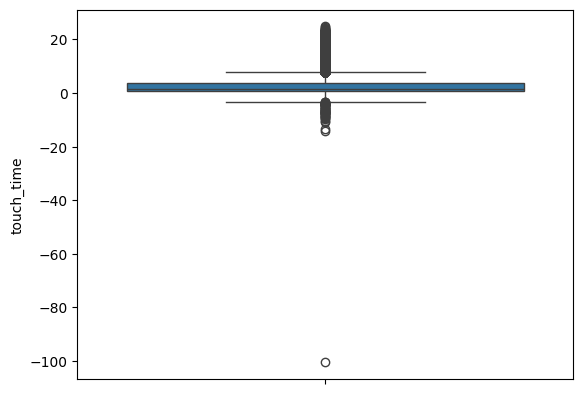

<Axes: ylabel='touch_time'>

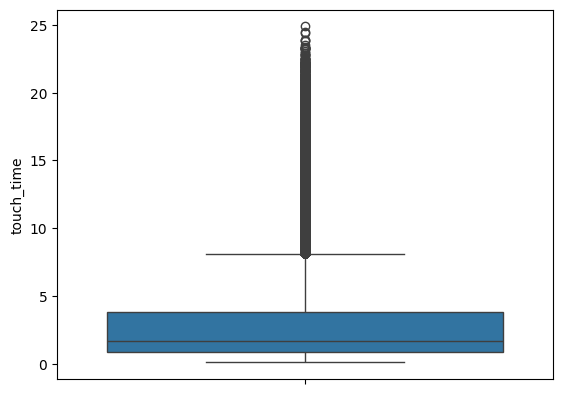

In [13]:
sns.boxplot(X['touch_time']) # Primjecujemo iz tablice da imamo strsece vrijednosit za touch_time
plt.show()
# touch_time je takodjer vremenska varijabla i nema smisla da ima negativnu vrijednost
X = X.loc[(X.touch_time > 0)]
sns.boxplot(X['touch_time'])

In [14]:
outliers = X[(X.touch_time > 10)]
len(outliers)
# ove outliere nema smisla izbacivat

4011

Vidimo da period, odnosno cetvrti imaju max vrijednost koja nema smisla, izbacujemo sve koji su veci od 4, jer su 4 cetvrti u jednom gameu

In [15]:
X = X.loc[(X.period <= 4)]
X.describe()

,final_margin,shot_number,period,shot_clock,dribbles,touch_time,shot_dist,pts_type,close_def_dist
count,118413.000000,118413.000000,118413.000000,118413.000000,118413.000000,118413.000000,118413.000000,118413.000000,118413.000000
mean,0.259938,6.397642,2.448414,12.333749,2.030478,2.815857,13.610231,2.262936,4.147195
std,13.356795,4.596976,1.113967,5.661633,3.422067,2.924197,8.737587,0.440230,2.742733
min,-53.000000,1.000000,1.000000,0.000000,0.000000,0.100000,0.000000,2.000000,0.000000
25%,-9.000000,3.000000,1.000000,8.100000,0.000000,0.900000,4.900000,2.000000,2.300000
50%,1.000000,5.000000,2.000000,12.200000,1.000000,1.700000,13.900000,2.000000,3.700000
75%,9.000000,9.000000,3.000000,16.400000,2.000000,3.800000,22.500000,3.000000,5.300000
max,53.000000,36.000000,4.000000,24.000000,32.000000,24.900000,43.300000,3.000000,53.200000


### Matrica dijagrama rasprsenja

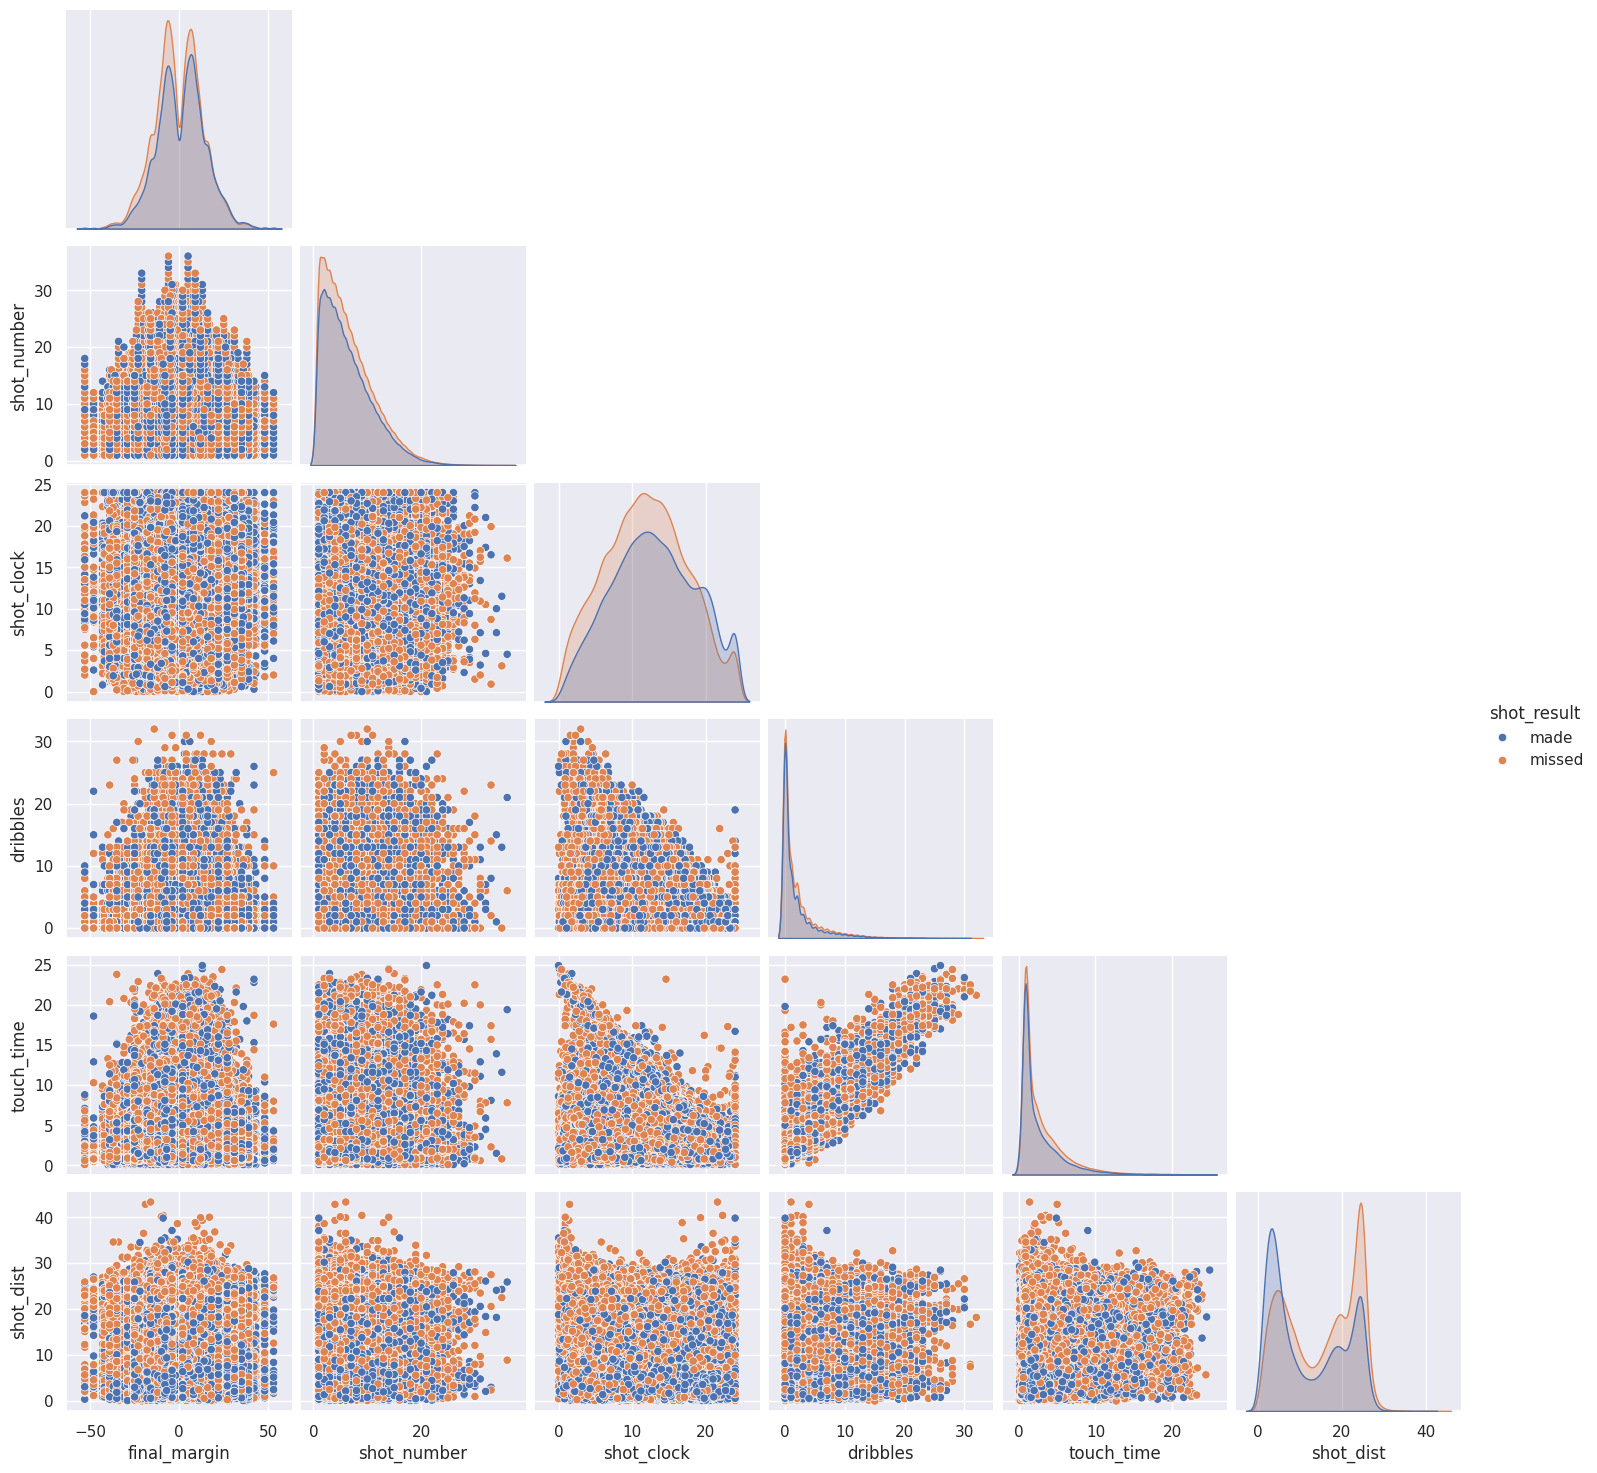

In [16]:
sns.set(rc={'figure.figsize':(25,15)})
sns.pairplot(X.loc[:,['final_margin', 'shot_number', 'shot_clock', 'dribbles', 'touch_time', 'shot_dist', 'shot_result']], hue="shot_result", corner=True)
plt.show()

### Finalan pregled dataseta

Text(0, 0.5, 'Total')

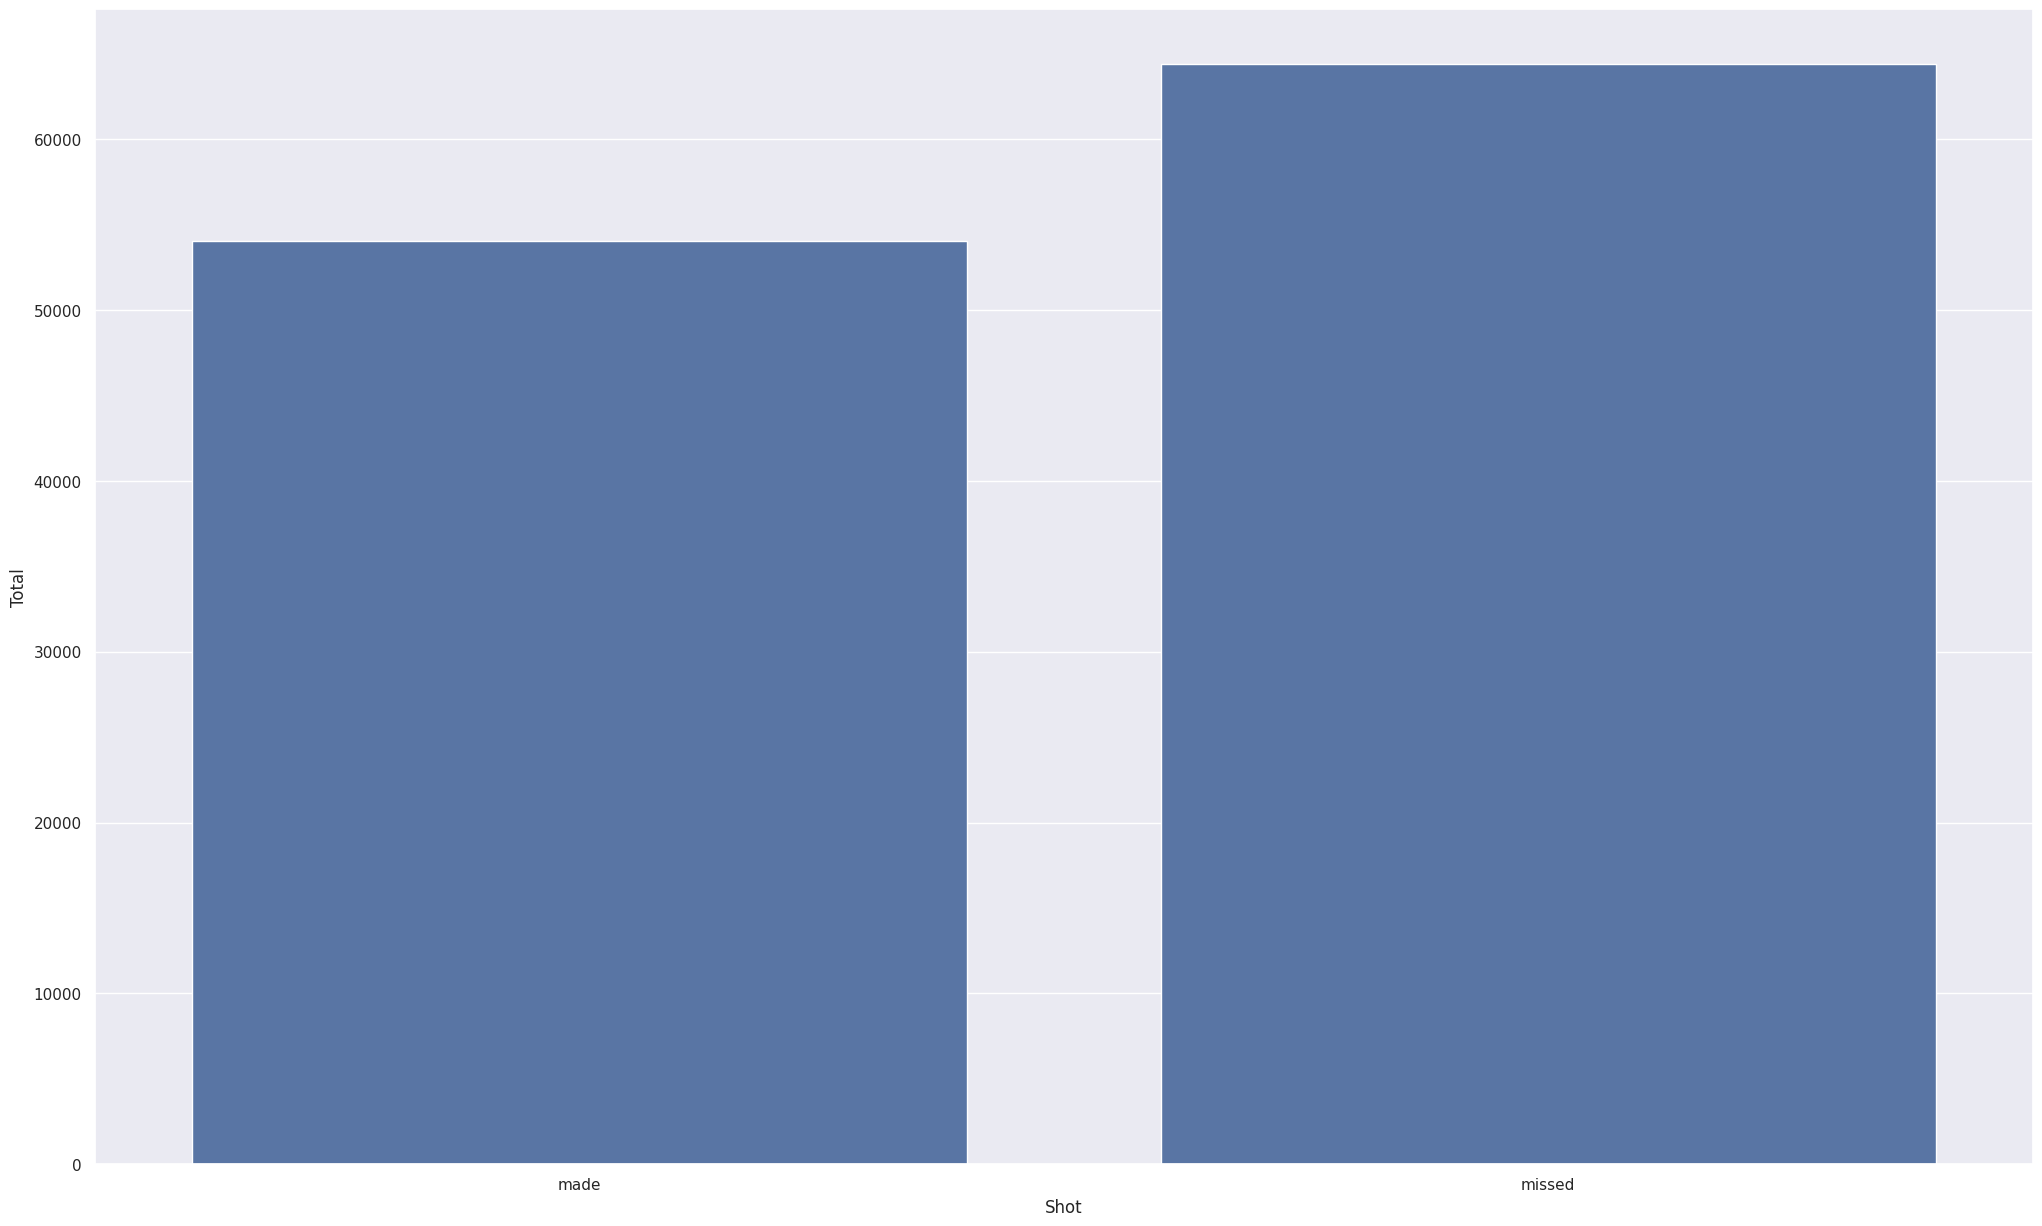

In [22]:
ax = sns.countplot(x="shot_result", data=X)
ax.set_xlabel("Shot")
ax.set_ylabel("Total")

In [24]:
X.describe()

,final_margin,shot_number,period,shot_clock,dribbles,touch_time,shot_dist,pts_type,close_def_dist
count,118413.000000,118413.000000,118413.000000,118413.000000,118413.000000,118413.000000,118413.000000,118413.000000,118413.000000
mean,0.259938,6.397642,2.448414,12.333749,2.030478,2.815857,13.610231,2.262936,4.147195
std,13.356795,4.596976,1.113967,5.661633,3.422067,2.924197,8.737587,0.440230,2.742733
min,-53.000000,1.000000,1.000000,0.000000,0.000000,0.100000,0.000000,2.000000,0.000000
25%,-9.000000,3.000000,1.000000,8.100000,0.000000,0.900000,4.900000,2.000000,2.300000
50%,1.000000,5.000000,2.000000,12.200000,1.000000,1.700000,13.900000,2.000000,3.700000
75%,9.000000,9.000000,3.000000,16.400000,2.000000,3.800000,22.500000,3.000000,5.300000
max,53.000000,36.000000,4.000000,24.000000,32.000000,24.900000,43.300000,3.000000,53.200000


In [25]:
X

,location,w,final_margin,shot_number,period,game_clock,shot_clock,dribbles,touch_time,shot_dist,pts_type,shot_result,close_def_dist
0,A,W,24,1,1,1:09,10.8,2,1.9,7.7,2,made,1.3
1,A,W,24,2,1,0:14,3.4,0,0.8,28.2,3,missed,6.1
3,A,W,24,4,2,11:47,10.3,2,1.9,17.2,2,missed,3.4
4,A,W,24,5,2,10:34,10.9,2,2.7,3.7,2,missed,1.1
5,A,W,24,6,2,8:15,9.1,2,4.4,18.4,2,missed,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128063,A,L,-16,4,2,5:05,15.3,2,1.6,8.9,2,made,5.7
128064,A,L,-16,5,3,1:52,18.3,5,6.2,8.7,2,missed,0.8
128065,A,L,-16,6,4,11:28,19.8,4,5.2,0.6,2,made,0.6
128066,A,L,-16,7,4,11:10,23.0,2,4.2,16.9,2,made,4.2
